Customer Personality Analysis

Import necessary libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')

In [11]:
df= pd.read_csv("C:/Users/u/Downloads/archive (20)/marketing_campaign.csv", sep='\t')

In [12]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [13]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [14]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [15]:
df.shape

(2240, 29)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [82]:
#df.describe().T transposes the summary statistics computed for numerical columns in the DataFrame df.

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [83]:
#df.isna().sum() calculates the number of missing values (NaNs) for each column in the DataFrame df.

In [84]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Children               0
Age                    0
TotalSpend             0
Income_to_spend        0
TotalNumPurchases      0
num_discounted         0
web_to_total           0
catalog_to_total       0
Store_to_total         0
num_cmp                0
isParent               0
withPartner            0
famsize                0


since there are some missing values in the income we will check that column and replace that with mean or median 

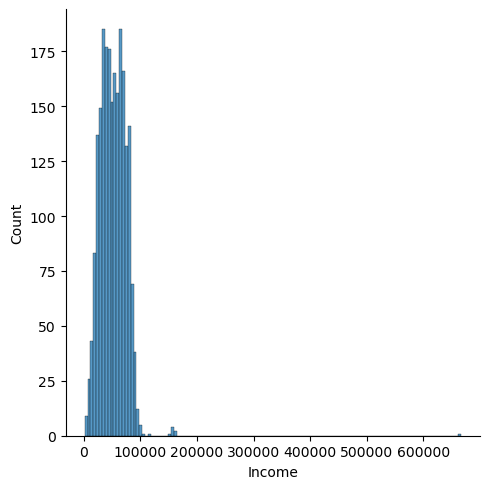

In [19]:
sns.displot(df['Income'])

since the data is left skewed we will replace the missing values with median 

In [21]:
df['Income']=df['Income'].fillna(df['Income'].median())

In [22]:
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [23]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

Note:-In above cell "Z_CostContact" and "Z_Revenue" have same value in all the rows that's why , they are not going to contribute anything in the model building. So we can drop them.

In [24]:
df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)

Univariate Analysis :-
1.Analysis on Year_Birth Variable.

In [25]:
print("Unique categories present in the Year_Birth:",df["Year_Birth"].value_counts())

Unique categories present in the Year_Birth: Year_Birth
1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: count, dtype: int64


In [34]:
for column in df.columns:
    if df[column].dtype=="O":
        print(df[column].value_counts())

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64
Dt_Customer
31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
25-05-2013     1
14-04-2013     1
09-01-2014     1
Name: count, Length: 663, dtype: int64


In [35]:
# Renaming categories of Education
df['Education'] = df['Education'].str.replace('2n Cycle', 'Master')

In [36]:
df['Education'].value_counts()

Education
Graduation    1127
Master         573
PhD            486
Basic           54
Name: count, dtype: int64

In [37]:
# Rename values in Marital_status 
df['Marital_Status'] = df['Marital_Status'].str.replace('Together','Married')
df['Marital_Status'] = df['Marital_Status'].str.replace('Divorced','Single')
df['Marital_Status'] = df['Marital_Status'].str.replace('Widow','Single')
df['Marital_Status'] = df['Marital_Status'].str.replace('Alone','Single')

In [38]:
df.drop(df[df['Marital_Status'] == 'Absurd'].index,inplace=True)
df.drop(df[df['Marital_Status'] == 'YOLO'].index,inplace = True)

In [39]:
df['Marital_Status'].value_counts()

Marital_Status
Married    1444
Single      792
Name: count, dtype: int64

In [45]:
print(f"Last Purchased year {df['Dt_Customer'].max()}")

Last Purchased year 31-12-2013


In [41]:
# Convert columns kidhome and Teenhom into Children
#Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.
df['Children'] = df['Kidhome'] + df['Teenhome']
df['Age'] =2015 - df['Year_Birth']

In [42]:
# Create total spending column
df['TotalSpend'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts']+ df['MntSweetProducts']+ df['MntGoldProds']

In [43]:
#checks how much of a customer's income is spent purchasing these products
df['Income_to_spend'] = round(df['TotalSpend']/df['Income'],3)

In [44]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Children,Age,TotalSpend,Income_to_spend
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,1,0,58,1617,0.028
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,2,61,27,0.001
2,4141,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,0,50,776,0.011
3,6182,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,1,31,53,0.002
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,1,34,422,0.007


In [47]:
#number of purchases the customer made
df['TotalNumPurchases'] = df.NumWebPurchases + df.NumCatalogPurchases + df.NumStorePurchases

In [48]:
#number of purchases that were discounted
df['num_discounted'] = round(df['NumDealsPurchases']/df['TotalNumPurchases'],3)

In [49]:
#check which percent of purchases that were made per platform
df['web_to_total'] = round(df.NumWebPurchases/df.TotalNumPurchases,3)
df['catalog_to_total'] = round(df.NumCatalogPurchases/df.TotalNumPurchases,3)
df['Store_to_total'] = round(df.NumStorePurchases/df.TotalNumPurchases,3)

In [50]:
#counts the number of campaigns that the customer accepted
df['num_cmp'] = df.AcceptedCmp1 + df.AcceptedCmp2 + df.AcceptedCmp3 + df.AcceptedCmp4 + df.AcceptedCmp5 + df.Response

<Axes: title={'center': 'TotalSpend'}, xlabel='Children'>

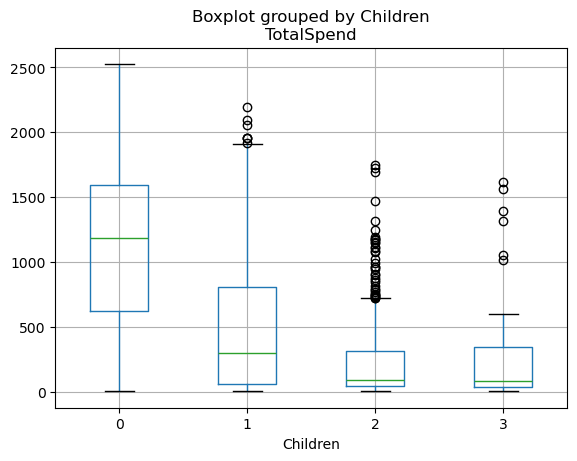

In [51]:
#graph to see if there is a relationship between total amount spent and number of children
df.boxplot(column = 'TotalSpend',by ='Children')

<Axes: >

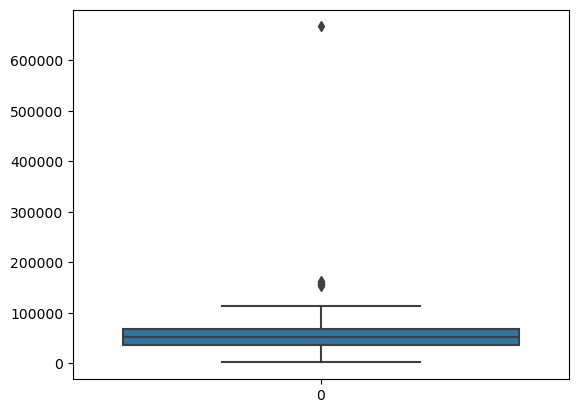

In [52]:
#graph to spot outliers
sns.boxplot(df['Income'])

<Axes: xlabel='Income', ylabel='Count'>

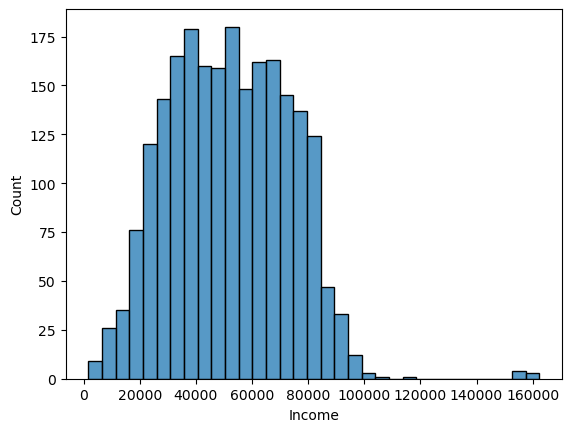

In [53]:
#removed the one big outlier spotted
df=df.loc[df.Income<df.Income.max()]
#check the distribution of the income, seems relatively normal
sns.histplot(df.Income)

<Axes: xlabel='TotalSpend', ylabel='Count'>

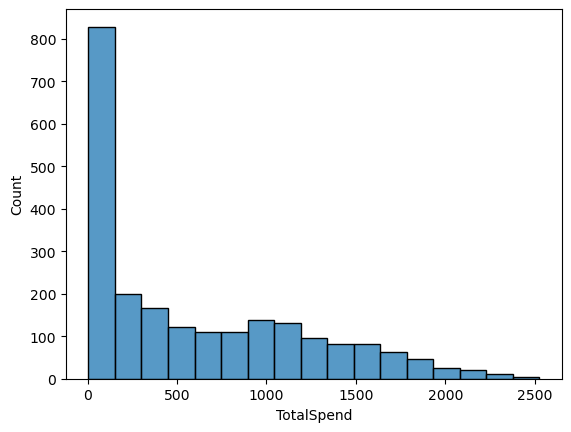

In [54]:
#check the distribution of amount spent and it seems skewed
sns.histplot(df.TotalSpend)

<Axes: xlabel='Education', ylabel='Income'>

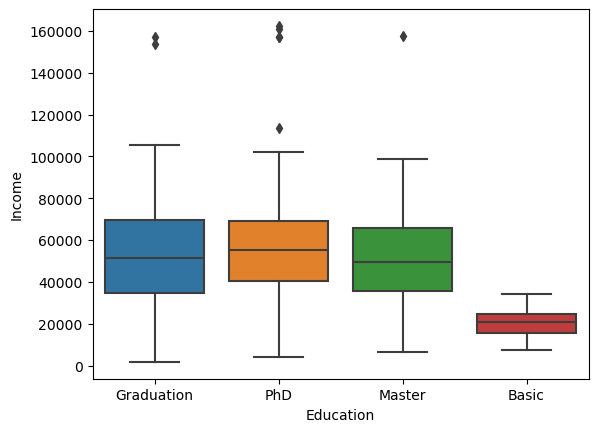

In [55]:
#checked to see if education had a big impact on income and aside from the basic education level, it did no seem like it
sns.boxplot(x=df.Education, y=df.Income)

<Axes: title={'center': 'Income'}, xlabel='Marital_Status'>

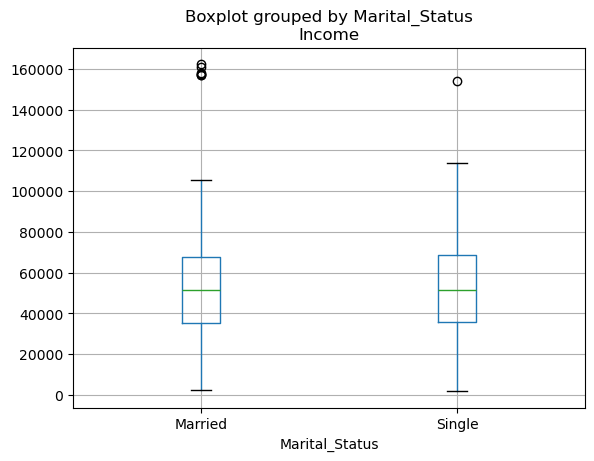

In [56]:
#checked the income range between different marital_statuses
df.boxplot(column = 'Income', by = 'Marital_Status')

In [57]:
#created a column to check if someone is a parent and if they had a partner
df['isParent'] = df.Children.apply(lambda x: 1 if x > 0 else 0)
df['withPartner'] = df.Marital_Status.apply(lambda x: 1 if x == 'Partner' else 0)

In [58]:
#checks for whole family size
df['famsize'] = df.Children + df.withPartner + 1

<Axes: >

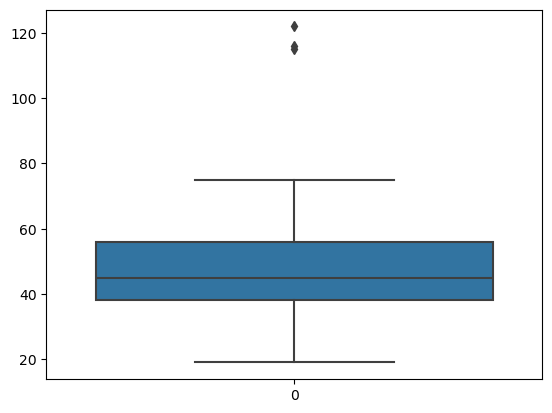

In [59]:
sns.boxplot(df['Age'])

<Axes: xlabel='TotalSpend', ylabel='TotalNumPurchases'>

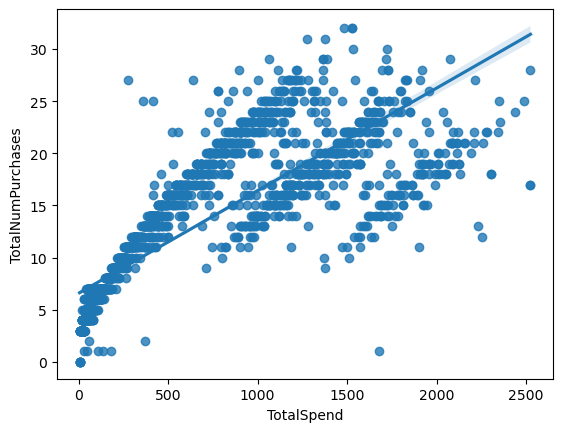

In [60]:
#spotted an outlier and put an age cap to limit it 
df = df.loc[df.Age < 100]
#check for the relationship between total amount spent and total number purhcases
sns.regplot(x = df.TotalSpend, y = df.TotalNumPurchases)

<Axes: xlabel='num_cmp', ylabel='TotalSpend'>

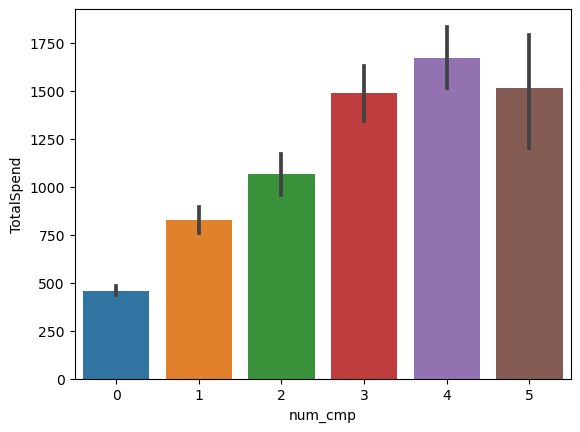

In [61]:
#check to see if the number of successful campaigns increased sales
sns.barplot(y = 'TotalSpend', x = 'num_cmp', data = df)

In [63]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Income_to_spend,TotalNumPurchases,num_discounted,web_to_total,catalog_to_total,Store_to_total,num_cmp,isParent,withPartner,famsize
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0.028,22,0.136,0.364,0.455,0.182,1,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0.001,4,0.500,0.250,0.250,0.500,0,1,0,3
2,4141,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,...,0.011,20,0.050,0.400,0.100,0.500,0,0,0,1
3,6182,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,...,0.002,6,0.333,0.333,0.000,0.667,0,1,0,2
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0.007,14,0.357,0.357,0.214,0.429,0,1,0,2


In [65]:
from sklearn.preprocessing import LabelEncoder
#Encode categorical data 
encode = LabelEncoder()
df['Education']=encode.fit_transform(df['Education'])
df['Marital_Status']=encode.fit_transform(df['Marital_Status'])
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Income_to_spend,TotalNumPurchases,num_discounted,web_to_total,catalog_to_total,Store_to_total,num_cmp,isParent,withPartner,famsize
0,5524,1957,1,1,58138.0,0,0,04-09-2012,58,635,...,0.028,22,0.136,0.364,0.455,0.182,1,0,0,1
1,2174,1954,1,1,46344.0,1,1,08-03-2014,38,11,...,0.001,4,0.500,0.250,0.250,0.500,0,1,0,3
2,4141,1965,1,0,71613.0,0,0,21-08-2013,26,426,...,0.011,20,0.050,0.400,0.100,0.500,0,0,0,1
3,6182,1984,1,0,26646.0,1,0,10-02-2014,26,11,...,0.002,6,0.333,0.333,0.000,0.667,0,1,0,2
4,5324,1981,3,0,58293.0,1,0,19-01-2014,94,173,...,0.007,14,0.357,0.357,0.214,0.429,0,1,0,2


In [67]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Children               0
Age                    0
TotalSpend             0
Income_to_spend        0
TotalNumPurchases      0
num_discounted         4
web_to_total           6
catalog_to_total       6
Store_to_total         6
num_cmp                0
isParent               0
withPartner            0
famsize                0


In [68]:
#replace infinite values with null and then drop the null rows
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(axis = 0,inplace=True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2226 entries, 0 to 2239
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2226 non-null   int64  
 1   Year_Birth           2226 non-null   int64  
 2   Education            2226 non-null   int32  
 3   Marital_Status       2226 non-null   int32  
 4   Income               2226 non-null   float64
 5   Kidhome              2226 non-null   int64  
 6   Teenhome             2226 non-null   int64  
 7   Dt_Customer          2226 non-null   object 
 8   Recency              2226 non-null   int64  
 9   MntWines             2226 non-null   int64  
 10  MntFruits            2226 non-null   int64  
 11  MntMeatProducts      2226 non-null   int64  
 12  MntFishProducts      2226 non-null   int64  
 13  MntSweetProducts     2226 non-null   int64  
 14  MntGoldProds         2226 non-null   int64  
 15  NumDealsPurchases    2226 non-null   int64 

In [70]:
#scale the values for kmeans clustering
features = ['Income', 'TotalSpend']
df1 = df[features]
fin_df1 = (df1 - df1.mean(axis=0)) / df1.std(axis=0)

In [71]:
fin_df1

,Income,TotalSpend
0,0.293808,1.676983
1,-0.264504,-0.963641
2,0.931697,0.280275
3,-1.196981,-0.920461
4,0.301146,-0.307637
...,...,...
2235,0.439848,1.218610
2236,0.571970,-0.271100
2237,0.239037,1.052533
2238,0.819599,0.391547


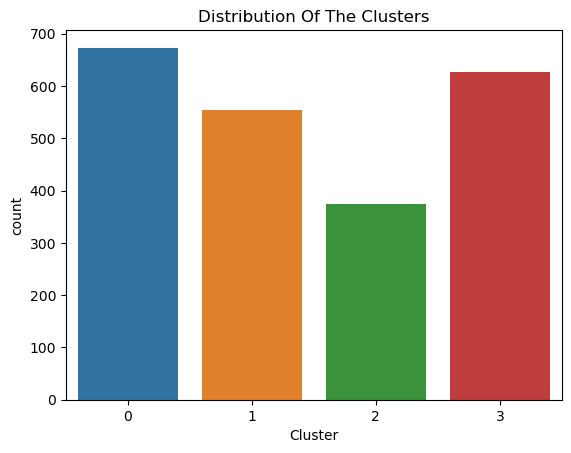

In [72]:
#cluster using kmeans
kmeans = KMeans(n_clusters=4, random_state=0)
df["Cluster"] = kmeans.fit_predict(fin_df1)

#chcek the distribution of the clusters
pl = sns.countplot(x=df["Cluster"])
pl.set_title("Distribution Of The Clusters")
plt.show()

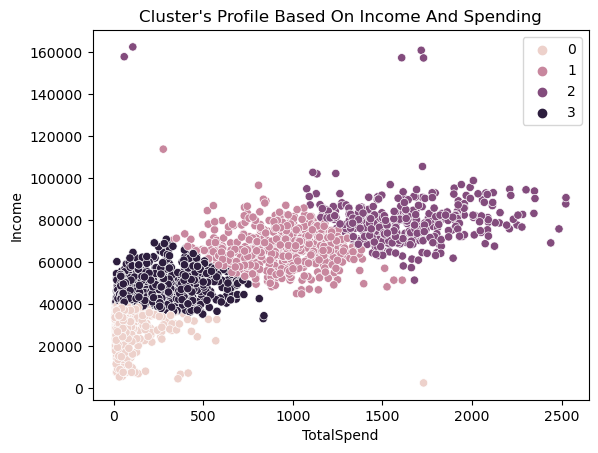

In [73]:
#check if there is a clear distinction between clusters with reference to income and total amount spent
pl = sns.scatterplot(data = df,x=df["TotalSpend"], y=df["Income"],hue=df["Cluster"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2226 entries, 0 to 2239
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2226 non-null   int64  
 1   Year_Birth           2226 non-null   int64  
 2   Education            2226 non-null   int32  
 3   Marital_Status       2226 non-null   int32  
 4   Income               2226 non-null   float64
 5   Kidhome              2226 non-null   int64  
 6   Teenhome             2226 non-null   int64  
 7   Dt_Customer          2226 non-null   object 
 8   Recency              2226 non-null   int64  
 9   MntWines             2226 non-null   int64  
 10  MntFruits            2226 non-null   int64  
 11  MntMeatProducts      2226 non-null   int64  
 12  MntFishProducts      2226 non-null   int64  
 13  MntSweetProducts     2226 non-null   int64  
 14  MntGoldProds         2226 non-null   int64  
 15  NumDealsPurchases    2226 non-null   int64 

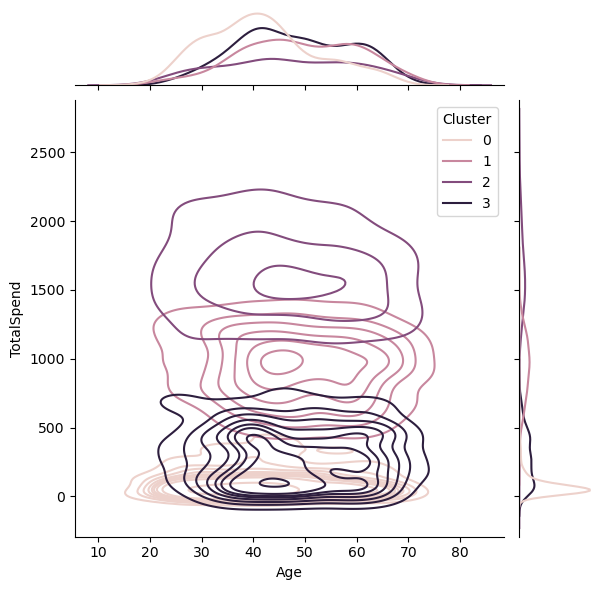

In [75]:
sns.jointplot(x=df['Age'], y=df["TotalSpend"], hue =df["Cluster"], kind="kde")

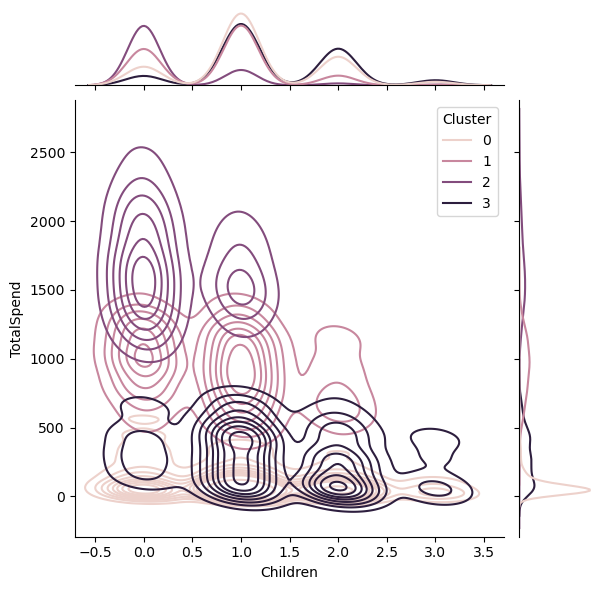

In [76]:
sns.jointplot(x=df['Children'], y=df["TotalSpend"], hue =df["Cluster"], kind="kde")

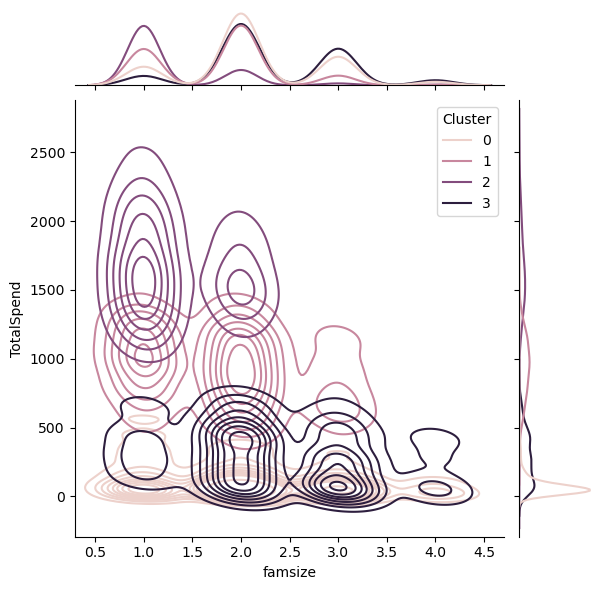

In [77]:
sns.jointplot(x=df['famsize'], y=df["TotalSpend"], hue =df["Cluster"], kind="kde")

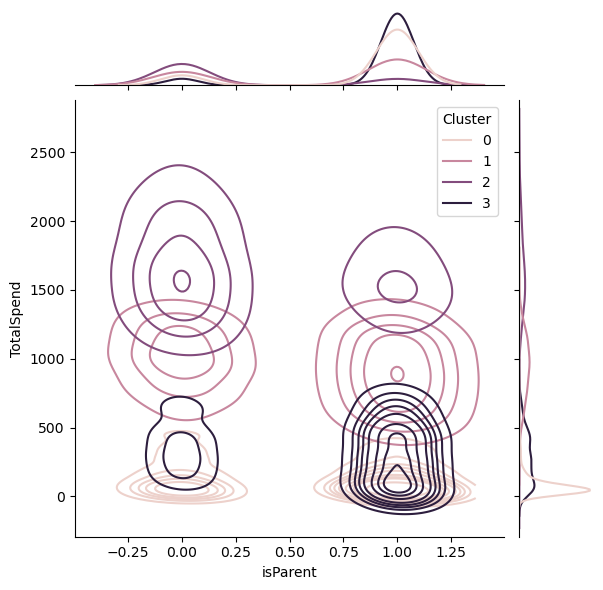

In [78]:
sns.jointplot(x=df['isParent'], y=df["TotalSpend"], hue =df["Cluster"], kind="kde")

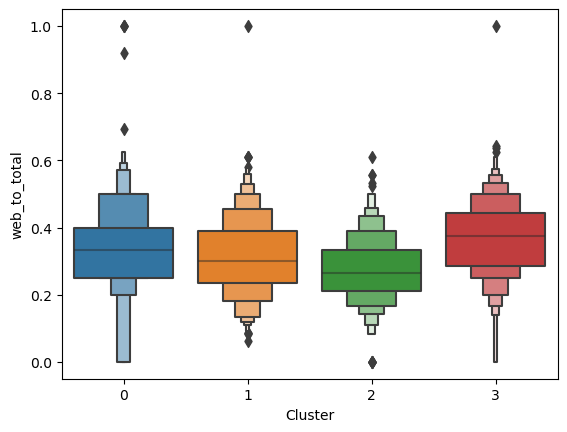

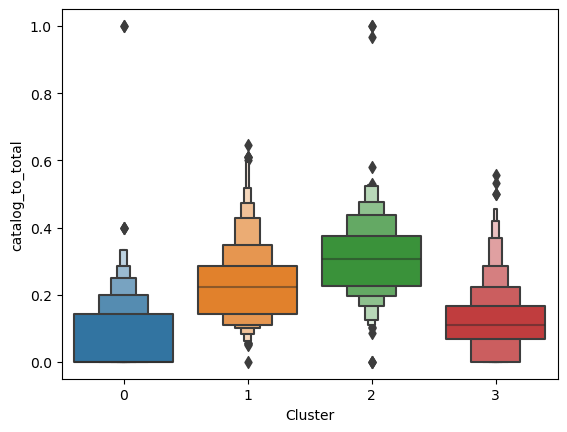

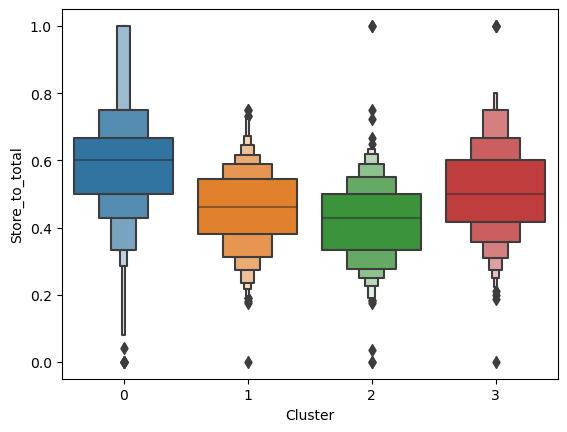

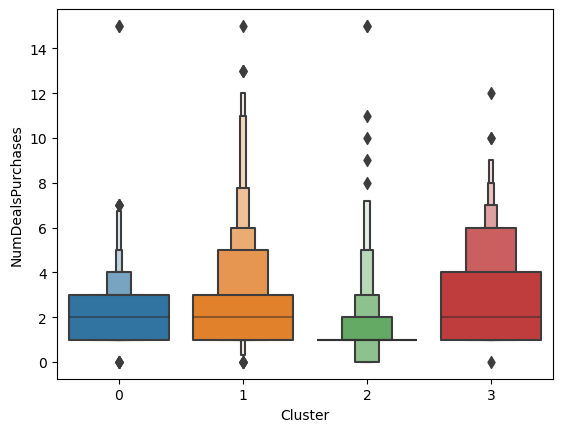

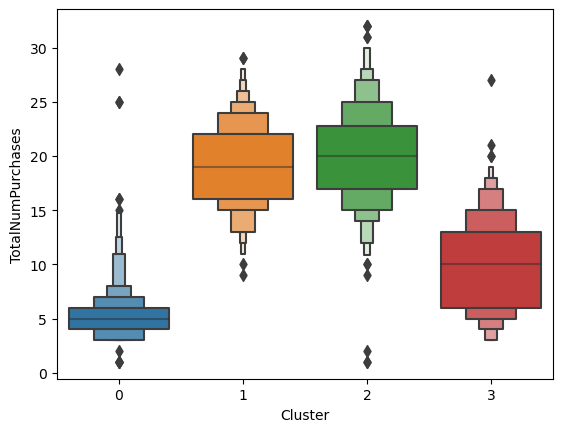

In [79]:
#Used ratios to better compare the mode of purchase between the clusters
trend = ["web_to_total", "catalog_to_total", "Store_to_total", "NumDealsPurchases", "TotalNumPurchases"]

for i in trend:
    plt.figure()
    sns.boxenplot(y=df[i], x =df["Cluster"])
    plt.show()

AttributeError: 'numpy.int32' object has no attribute 'startswith'

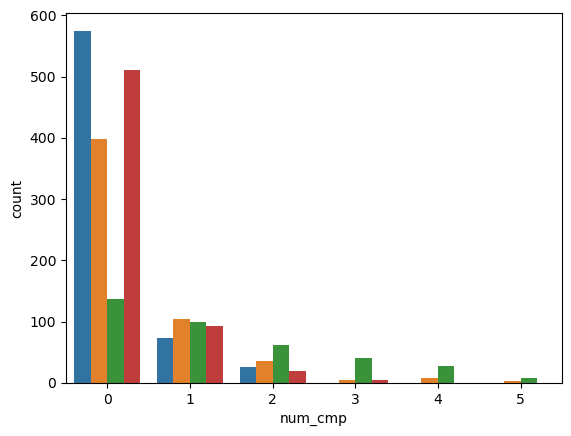

In [80]:
#check whether the campaigns were effective
sns.countplot(x=df["num_cmp"],hue=df["Cluster"])

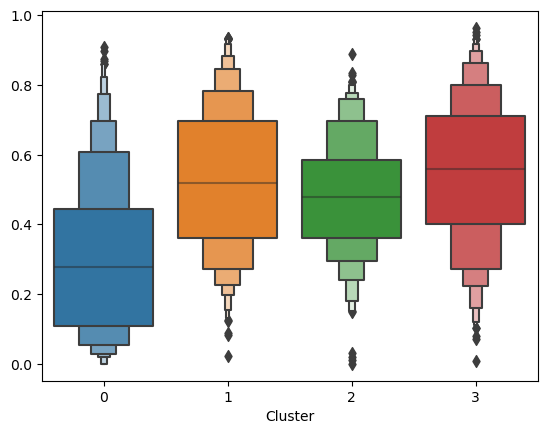

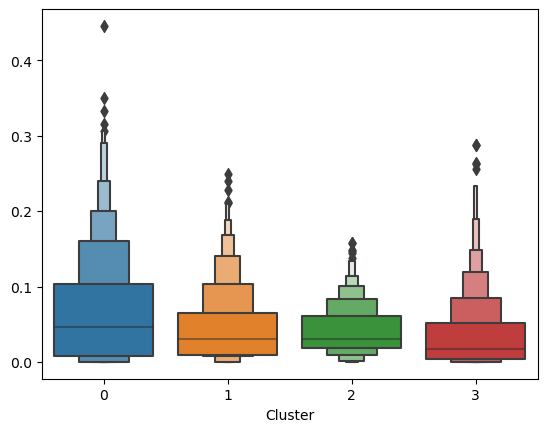

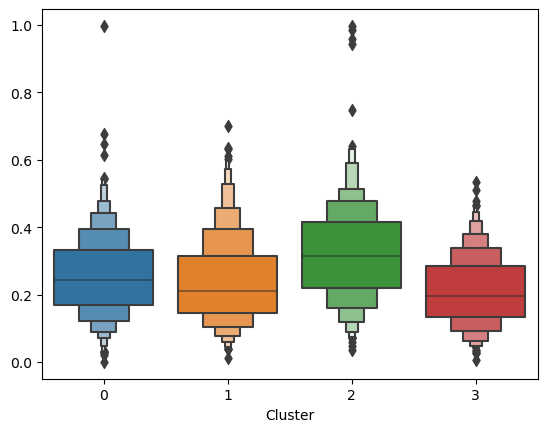

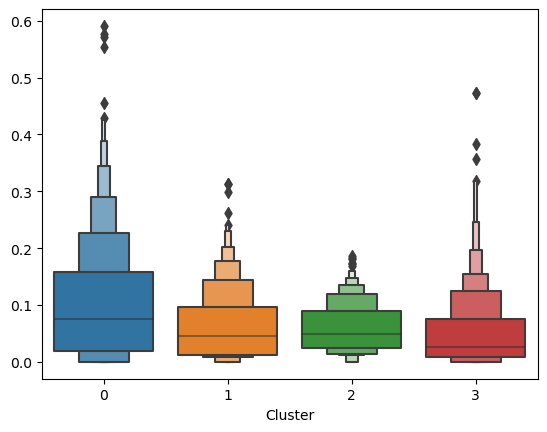

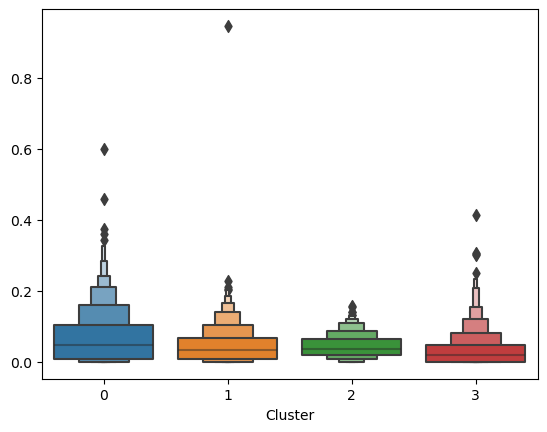

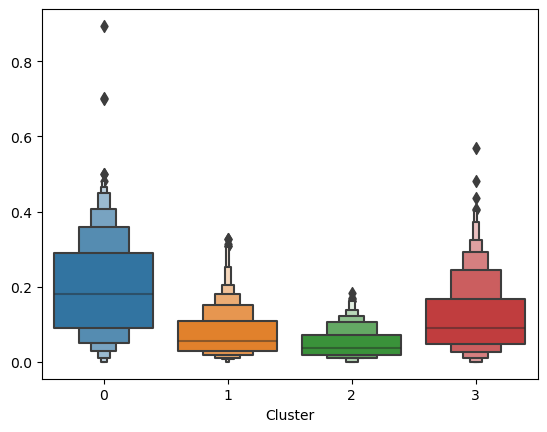

In [81]:
#check the amount to total ratio to be able to better compare product purchases between clusters
product = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts","MntSweetProducts", "MntGoldProds"]

for i in product:
    plt.figure()
    sns.boxenplot(y=(df[i]/df['TotalSpend']),  x=df["Cluster"])
    plt.show()